# SLTimer Tutorial 
This notebook shows you how to find the estimatation of a lens time delays from example light curve data using the `PyCS` code. You can work through a detailed tutorial notebook introducing the `PyCS` code [here.](https://github.com/DarkEnergyScienceCollaboration/SLTimer/blob/master/notebooks/PyCS_Tutorial.ipynb)

First, we'll import `SLTimer`, as well as a few other important commands. 

In [1]:
from __future__ import print_function
%matplotlib inline

import sys
sys.path.append('../python')
import desc.sltimer

%load_ext autoreload
%autoreload 2

Next, let's start a timer instance, and put it to work.

In [2]:
timer = desc.sltimer.SLTimer()

The timer can download the 'trialcurves.txt' dataset, which should contain 192 lines of data.

In [3]:
url = "https://raw.githubusercontent.com/COSMOGRAIL/PyCS/master/demo/demo1/data/trialcurves.txt"
timer.download(url)

Downloaded datafile: https://raw.githubusercontent.com/COSMOGRAIL/PyCS/master/demo/demo1/data/trialcurves.txt
Checking header of "trialcurves.txt"...
Reading "trialcurves.txt"...
[Trial/A] with 192 points imported (0 of them masked).
Checking header of "trialcurves.txt"...
Reading "trialcurves.txt"...
[Trial/B] with 192 points imported (0 of them masked).
Checking header of "trialcurves.txt"...
Reading "trialcurves.txt"...
[Trial/C] with 192 points imported (0 of them masked).
Checking header of "trialcurves.txt"...
Reading "trialcurves.txt"...
[Trial/D] with 192 points imported (0 of them masked).


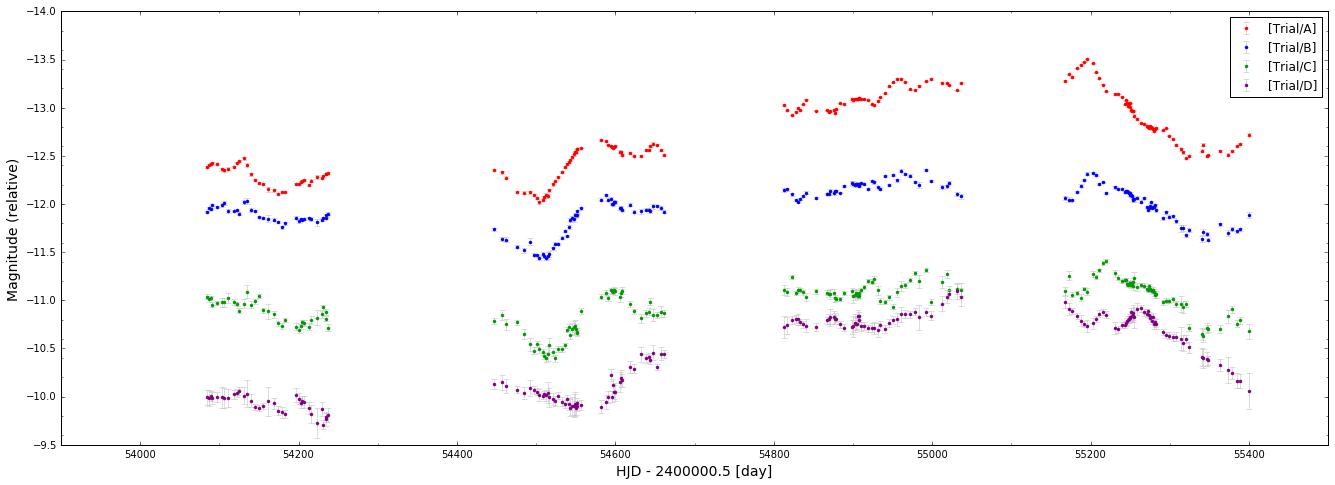

In [4]:
timer.display_light_curves()

Let's use the free-knot spline models for both the intrinsic (AGN) and extrinsic (microlensing) variability on your data, using the `PyCS` code and following the `PyCS` tutorial.

>You can also try `microlensing='polynomial'`.

>By default, `error=None` when calling `estimate_time_delays`:
>To find only the intrinsic variance: `error='intrinsic variance'`.
>To find the full error bars, the relationship between the points, and the instrinsic variance, use: `error='complete'`

In [5]:
timer.estimate_time_delays(method='pycs',microlensing='spline',agn='spline',error=None)

You are using the pycs method.
Starting opt_rough on initial delays :
AB   +0.00 | AC   +0.00 | AD   +0.00 | BC   +0.00 | BD   +0.00 | CD   +0.00
Aiming at first curve.
Starting ML optimization ...
Working on the spline ML of [Trial/A]|~3/u/7~|
Working on the spline ML of [Trial/B](0.000,-0.647,0)|~3/u/7~|
Working on the spline ML of [Trial/C](0.000,-1.603,0)|~3/u/7~|
Working on the spline ML of [Trial/D](0.000,-2.092,0)|~3/u/7~|
Done !
First spline and ML opt done.
AB   -6.00 | AC  -12.00 | AD  -12.00 | BC   -6.00 | BD   -6.00 | CD   +0.00    (Iteration  1, r2 =  10619.2)
AB   -9.00 | AC  -18.00 | AD  -20.00 | BC   -9.00 | BD  -11.00 | CD   -2.00    (Iteration  2, r2 =  10035.5)
AB  -10.00 | AC  -21.00 | AD  -26.00 | BC  -11.00 | BD  -16.00 | CD   -5.00    (Iteration  3, r2 =   9845.3)
AB  -11.00 | AC  -22.00 | AD  -31.00 | BC  -11.00 | BD  -20.00 | CD   -9.00    (Iteration  4, r2 =   9724.9)
AB  -12.00 | AC  -23.00 | AD  -35.00 | BC  -11.00 | BD  -23.00 | CD  -12.00    (Iteration  5,

In [6]:
timer.report_time_delays()

Time Delays:
AB   -4.49
AC  -20.90
AD  -68.11
BC  -16.41
BD  -63.62
CD  -47.21


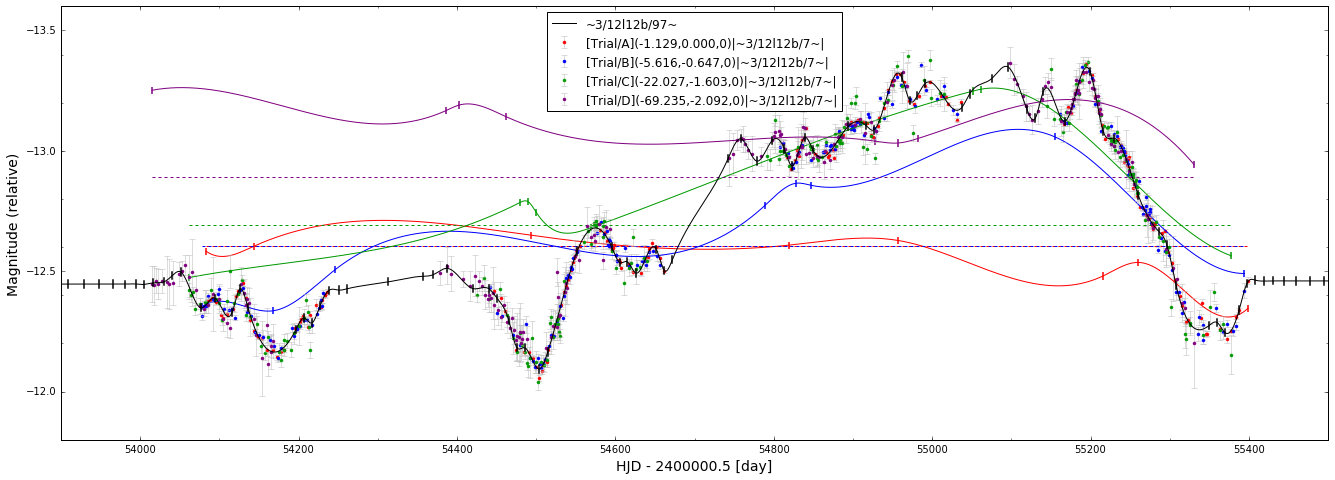

In [ ]:
timer.display_light_curves()

While we could have estimated the time delay uncertainties above, with a command like
```python
timer.estimate_time_delays(method='pycs',microlensing='spline',agn='spline',error='complete')
```
we can still do the calculation, with the `estimate_uncertainties` method:

In [ ]:
timer.estimate_uncertainties(n=1,npkl=4)

The old files have been deleted.
('Making', 4, 'copies of the original dataset:')
Now thowing dice into sims_copies ...
Input shifts :
A    -1.13 | B    -5.62 | C   -22.03 | D   -69.24
Input delays :
AB   -4.49 | AC  -20.90 | AD  -68.11 | BC  -16.41 | BD  -63.62 | CD  -47.21
Preparing 1 identical copies for pkl 1/4 ...
Wrote sims_copies/1_1467332269.60808.pkl
Preparing 1 identical copies for pkl 2/4 ...
Wrote sims_copies/2_1467332269.61532.pkl
Preparing 1 identical copies for pkl 3/4 ...
Wrote sims_copies/3_1467332269.62363.pkl
Preparing 1 identical copies for pkl 4/4 ...
Wrote sims_copies/4_1467332269.62982.pkl
('Making', 4, 'synthetic datasets, varying time delays by +/-', 4.0, 'days')
Now thowing dice into sims_mocks ...
Input shifts :
A    -1.13 | B    -5.62 | C   -22.03 | D   -69.24
Input delays :
AB   -4.49 | AC  -20.90 | AD  -68.11 | BC  -16.41 | BD  -63.62 | CD  -47.21
Drawing 1 simulations for pkl 1/4 ...
Wrote sims_mocks/1_1467332269.64160.pkl
Drawing 1 simulations for pkl 2/

/Users/pjm/miniconda2/lib/python2.7/site-packages/pycs/gen/spl.py:342: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (self.t == None):


Wrote sims_mocks/3_1467332269.76287.pkl
Drawing 1 simulations for pkl 4/4 ...
Wrote sims_mocks/4_1467332269.81684.pkl
I have found 4 simulation pickles in sims_copies.
I'll write my results into the directory sims_copies_opt_spl.
Initial conditions : 
[Trial/A](-1.129,0.000,0)|~3/12l12b/7~|
[Trial/B](-5.616,-0.647,0)|~3/12l12b/7~|
[Trial/C](-22.027,-1.603,0)|~3/12l12b/7~|
[Trial/D](-69.235,-2.092,0)|~3/12l12b/7~|
--- Casino running on simset copies, optset spl ---
Read sims_copies/1_1467332269.60808.pkl
Working for sims_copies_opt_spl/1_1467332269.60808_runresults.pkl, 1 simulations.
Starting the curve shifting on a single CPU, no multiprocessing...
Starting opt_rough on initial delays :
DA  +78.49 | DB  +68.88 | DC  +62.82 | AB   -9.61 | AC  -15.67 | BC   -6.06
Aiming at first curve.
Starting ML optimization ...
Working on the spline ML of [Trial/D](-76.273,-2.092,0)|~3/12l12b/7~|
Working on the spline ML of [Trial/A](2.216,0.000,0)|~3/12l12b/7~|
Working on the spline ML of [Trial/B](

/Users/pjm/miniconda2/lib/python2.7/site-packages/pycs/sim/run.py:130: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if qs != None:


BC  -13.82 | BD  -72.05 | BA   +6.66 | CD  -58.22 | CA  +20.48 | DA  +78.70    (Iteration  1, r2 =   7970.6)
BC  -13.82 | BD  -74.05 | BA   +5.66 | CD  -60.22 | CA  +19.48 | DA  +79.70    (Iteration  2, r2 =   7860.0)
BC  -13.82 | BD  -76.05 | BA   +5.66 | CD  -62.22 | CA  +19.48 | DA  +81.70    (Iteration  3, r2 =   7832.3)
BC  -13.82 | BD  -77.05 | BA   +5.66 | CD  -63.22 | CA  +19.48 | DA  +82.70    (Iteration  4, r2 =   7818.9)
BC  -13.82 | BD  -77.05 | BA   +5.66 | CD  -63.22 | CA  +19.48 | DA  +82.70    (Iteration  5, r2 =   7814.8)
Rough time shifts done :
BC  -13.82 | BD  -77.05 | BA   +5.66 | CD  -63.22 | CA  +19.48 | DA  +82.70
Starting opt_rough on initial delays :
BC  -13.82 | BD  -77.05 | BA   +5.66 | CD  -63.22 | CA  +19.48 | DA  +82.70
Aiming at first curve.
Starting ML optimization ...
Working on the spline ML of [Trial/B](-5.570,-0.647,0)|~3/12l12b/7~|
Working on the spline ML of [Trial/C](-19.393,-1.603,0)|~3/12l12b/7~|
Working on the spline ML of [Trial/D](-82.615,-2